PD# Dimensionality Reduction (Principal Component Analysis) 

- Student should be able to Recognize when p > n, and why this leads to failure of certain ML models
- Student should be able to Recognize high dimensionality data, and can employ PCA to improve model performance
- Student should be able to Understand the roles of covariance matrices and eigenvectors in finding a dataset’s principle components
- Student should be able to Understand the limitations that come with projecting data onto an eigenvector subspace

# The Curse of Dimensionality

The Curse of Dimensionality is a term that is used to refer to some of the challenges and limitations that arise from trying to process or model datasets with a large number of features. (hundreds or thousands)

## What is a Dimension?

Imagine that we have a dataset with 50 numeric datapoints. How would we graph a single column of data? Well, we have nothing else in the dataset to compare it to, so all that we can do is really plot the values on a one-dimensional number line.

In [0]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# Create a list of 50 random floats and add them to a dataframe
N = 50
x = np.random.rand(N)*100

# Crete Dataframe
data = {"x": x}
df = pd.DataFrame(data)
df.head()

,x
0,91.661852
1,57.389340
2,80.622474
3,40.581956
4,80.409636


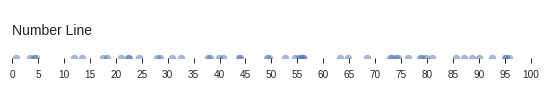

In [0]:
# Plot the floats on a number line

# Setup a plot such that only the bottom spine is shown
def setup(ax):
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(which='major', width=1.00)
    ax.tick_params(which='major', length=5)
    ax.tick_params(which='minor', width=0.75)
    ax.tick_params(which='minor', length=2.5)
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 1)
    ax.patch.set_alpha(0.0)
    
plt.figure(figsize=(8, 6))
n = 8

# Create some y values to satisfy matplotlib
df['y'] = pd.Series(list(np.zeros(50)))

# Multiple Locator tick mark settings
ax = plt.subplot(n, 1, 2)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.text(0.0, 0.5, "Number Line", fontsize=14,
        transform=ax.transAxes)

# Push the top of the top axes outside the figure because we only show the
# bottom spine.
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=1.05)
plt.scatter(df.x, df.y, alpha=0.5)

plt.show()

## JUST LET ME PLOT POINTS ON A NUMBER LINE IS THAT TOO MUCH TO ASK?!?

<center>!["UGH"](https://media.giphy.com/media/l3q2Hy66w1hpDSWUE/giphy.gif)</center>

### Anyway... back to dimensions.

## Two Dimensions
What if I wanted to plot plot these points on a two-dimensional graph like a scatter plot? Well, I would need y values to tell the points where to go, or else they would just sit on the x-axis of the 2D graph. If we don't have any y values, the additional axis of the coordinate plane serves no purpose.

The number line is a 1D graph with 1D data. Scatter plots are 2Ds graphs that facilitate 2D data.

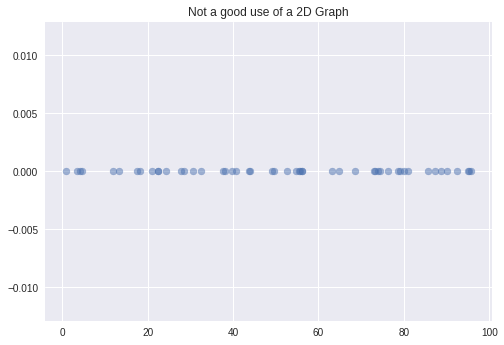

In [0]:
plt.scatter(df.x, df.y, alpha=0.5)
plt.title("Not a good use of a 2D Graph")
plt.show()

In [0]:
# Generate 50 random y values and add them to the dataframe
df['y'] = pd.Series(list(np.random.rand(N)*100))
df.head()

,x,y
0,87.224509,0.828650
1,22.433375,59.655565
2,54.646833,69.856257
3,49.150725,30.249769
4,72.895643,7.607457


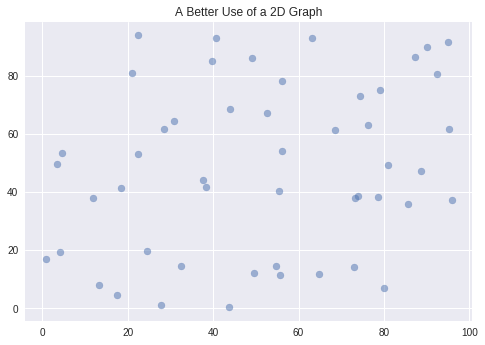

In [0]:
# Graph 2D data on a 2D plot
plt.scatter(df['x'], df['y'], alpha=0.5)
plt.title("A Better Use of a 2D Graph")
plt.show()

### That's how easy the number line should have been... Somebody fix it and submit a Pull Request to Matplotlib
![Drake Pointing](http://img2.thejournal.ie/answer/56054/rectangle?width=260&version=53090)

## Lets do 3-Dimensional Data on a 3-Dimensional Graph!

I hope you've realized that the number of dimensions that we want to plot, the number of columns that is required in the dataframe. This is why you'll hear people refer to Dataframe columns: Columns, Features, and Dimensions, interchangeably.

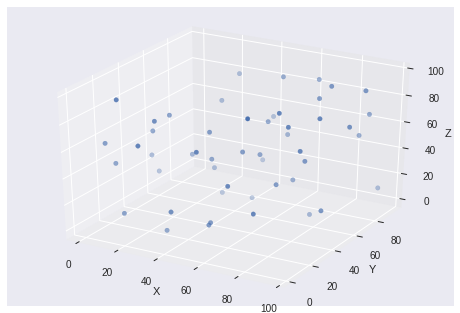

In [0]:
from mpl_toolkits.mplot3d import Axes3D

# Add Z dimension to dataframe
df['z'] = pd.Series(list(np.random.rand(N)*100))

threedee = plt.figure().gca(projection='3d')
threedee.scatter(df['x'], df['y'], df['z'])
threedee.set_xlabel('X')
threedee.set_ylabel('Y')
threedee.set_zlabel('Z')
plt.show()

## 3D Graphs on 2D screens are a lie... unless they can rotate.

Unless this graph can rotate like a hologram it's a 2D graph that's trying really hard, yet failing to be a 3D graph. Look more closely at the pionts and you'll realize that you actually have no idea where they are at. You have no depth perception unless you can rotate the graph. This is something that's possible to do in iPython notebooks, but that I didn't want to mess with right now. You can explore it on your own. Some libraries will try and change the diameter of the points so that ones "closer" to the viewer have some kind of depth, but this is an imperfect solution.

## What if we tried a spatially represent 4-Dimensional Data in a 4D graph?

<center>![Mind Blown](https://ih1.redbubble.net/image.400523286.2984/ap,550x550,16x12,1,transparent,t.u3.png)</center>

While it **is** technically possible to plot points on a 4-Dimensional graph, the result is by no means intuitive and suffers from even worse interpretation problems than the 3D graph.

<center>![Hyper Cube](http://www.zamandayolculuk.com/09/4d_quadiper.gif)</center>

A cube is 3-dimensional, so any representation larger than 3 dimensions is referred to as an n-dimensional hypercube in n-dimensional hyperspace. This is why in space movies/books they always zoom to "hyperspace" when they're trying to take a shortcut through the 3 spatial dimensions of our reality.

## Now Lets do a 1000 dimensional dataset!

You see the problem? 

While the inability for the human brain to spatially comprehend more than 3 dimensions is not **really** the curse of dimensionality, this limitation of our human brain is related to some of the challenges of dealing with high-dimensional data.

## A thought experiment

A great explanation from a Quora user: (Sorry, I can't find the actual Quora post that this originated from) I've modified it a little bit as well.

```
Let's say you have a straight line 100 yards long and you dropped 10 pennies somewhere on it. It wouldn't be too hard to find one. You walk along the line and it takes a few seconds, maybe as long as a couple of minutes if you're unlucky.

Now let's say you have a square 100 yards on each side and you dropped 10 pennies somewhere on it. It would be harder. The pennies are more spread out now. This is like searching across two football fields stuck together. It could take hours or days to find one. (on average, 10 times longer than the first time)

Now imagine a cube 100 yards across. That's like searching a 30-story building the size of a football stadium. Ugh. (It's now 100 times harder to find a penny in this space than in the first example)

The difficulty of searching through the space gets exponentially harder as you have more dimensions.
```


## Challenges of High Dimensional Spacess

### More difficult to explore the data and create visualizations

<img src="https://seaborn.pydata.org/_images/seaborn-pairplot-1.png" height=400 width=400>

This pairplot shows us all of the possible scatterplots that could be created from a 4-dimensional dataset. Where the scatter plots would be plotted against themselves they have been replaced with histograms to show the distribution of a single variable.

Question: How many scatter plots would you have to look at if you had 1000 dimensions in a dataset?

- Remember that there are a lot of redundant scatterplots with pairplots

### Diminishing returns to adding features (increased redundancy)
Not every feature is as important as every other feature when it comes to capturing relationships in data. he likelihood of adding a feature that contributes meaningful signal to a particular predictive endeavor decreases with each additional dimension.

A good example of this is Deep Learning image recognition tasks:

![different resolution images](https://ccideas.com/wp-content/uploads/2012/02/hi-low-res.jpg)

How does increasing the number of pixels (dimensions of an image) increase our ability to detect what the image is? 

If an extra dimension is more expensive to process but adds less value to a model, then at some point it isn't cost effective to add additional dimensions.

### Increased computational workload

Just like how it takes more time to find the pennies in the 100x100x100 yard cube.

### Increased sparcity of data - Measures of distance (Euclidean) lose meaning 

As we add dimensions, our datapoints become more spread out. Just look at the difference between the 1-dimensional numberline and the 2-dimensional scatterplot that we did above. With each dimension that we add our datapoints spread out further, but at a decreasing rate. Eventually, in extremely high dimensional settings all datapoints appear to be more or less equidistant to one another. This is crippling to algorithms that rely upon measures of distance (Like Clustering for example). We'll talk more about this on Thursday! 

### Low number of observations relative to dimensions increases the risk of overfitting

![Overfitting vs Underfitting](https://cdn-images-1.medium.com/max/1125/1*_7OPgojau8hkiPUiHoGK_w.png)

The the degree to which increased dimensions can lead to overfitting varies from model to model. The above images are examples of a linear regression model that is attempting to fit a good line through the data. We'll talk about this extensively next week, but linear regression models can be curved, You've typically seen a straight line cutting through a cloud of points, but just no that fitting a curve to a cloud of points doesn't violate the linearity of the model equation. Don't worry about this too much right now.

With a linear regression you can create a bend in the line of best fit by introducing another parameter. This parameter has to come from your dataset as another feature (or dimension). If my cloud of points is made up of only 9 data points, then I can curve my line of best fit exactly through each point by including 9 parameters. When discussing this aspect of the Curse of Dimensionality we will abbreviate the number of parameters that we are including in the model (dimensions, features) as **P** and the number of observations (rows in a dataset) as **N**. 

If **P** $\geq$ **N** then I am at extreme risk of overfitting my model. Overfitting means that my model has fit to the noise or variance or the data rather than the acutal signal or phenomenon that we are trying to model. This damages the predictive accuracy of a model and makes it so that our model will not be able to generalize (perform well) to new data that it hasn't seen before.

### Rules of Thumb

While these rules of thumb can vary from model to model, some say that you should always make sure that you have 5 times the number of observations as you have parameters in your model. This is an easier task for some models than others. Some practitioners hold a more extreme view and say that the number of observations should be the square of the number of parameters. I think this is silly once you get to truly high numbers of dimensions, but some people are adamant about it (past professors of mine who really didn't deal with really high numbers of dimensions in their work and were blind to the existence of any other statistical approaches).


## Remember This: 

### You're in grave danger of overfitting if P $\geq$ N
### Make sure you have N = 5P (as a minimum)
### Having more observations is almost always better
### More data in terms of additional dimensions has diminishing value

## Solutions 

### Discard Redundant or 
### Get More Data - LOTS more data
### Don't measure similarity via Euclidean Distance
### Get More Data - more observations not more features

More data covereth a multitude of sins.


# Dimensionality Reduction Techniques:

The Curse of Dimensionality means that as "Big Data" gets bigger and bigger the challenges associated with it become more difficult. Not only is it difficult to explore and visualize high dimensional data, but also certain intuitions that exist in 2d or 3d space begin to betray us (distance between points for example). Also models that have a high feature to observation ratio are more prone to overfitting. 

What if we could take Big Data and make it smaller while still retaining most of its substance? In Machine Learning there are a whole host of Dimensionality Reduction Techniques that enable us to do exactly that. (with some tradeoffs - like always.)

## Feature Extraction:

Transformation of raw data into features suitable for modeling

## Feacture Selection: 

Removing Unnecessary Features

## PCA 

PCA is a technique that transforms a high dimensional dataset into a lower dimensional subspace. (Turns a dataset with lots of columns into a dataset with a few columns while preserving the maximum amount of information.)




Useful for visualizations
Further Exploration
Reduces the size of a dataset while maintaining as much of the signal (variance) from the original dataset as possible

